In [24]:
import pandas as pd
import numpy as np
import os
import datetime
import re

In [25]:
data = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/temperature_history.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/david/Git/Energy-Forecasting/data/temperature_history.csv'

In [ ]:
data.dropna(how='any', axis=0, inplace=True)

total_zones = pd.DataFrame({"Zone": [], "Date": [], "Hour": [], "Load": []})

for counter in range(data["station_id"].nunique()):

    zone = data[data['station_id'] == counter].drop(columns=['station_id'])
    new_zone = pd.DataFrame({"Zone": [], "Date": [], "Hour": [], "Load": []})

    for index, row in zone.iterrows():
        day = int(row['day'])
        month = int(row['month'])
        year = int(row['year'])

        # print(f"{type(day)} {type(month)} {type(year)}")

        date = datetime.date(year, month, day)

        for index, value in row.items():
            if re.search("h[0-9]+", index):
                time = int(re.sub("h", "", index)) - 1
                new_zone.loc[len(new_zone)] = {"Zone": counter, "Date": date, "Hour": time, "Load": value}

    total_zones = pd.concat([total_zones, new_zone])

In [ ]:
total_zones.to_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_temp.csv", index=False)

In [ ]:
data.dropna(how='any', axis=0, inplace=True)
zone_1 = data[data['zone_id'] == 1].drop(columns=['zone_id'])

In [ ]:
zone_1.head()

,year,month,day,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,2004,1,1,"16,853","16,450","16,517","16,873","17,064","17,727","18,574",...,"13,518","13,138","14,130","16,809","18,150","18,235","17,925","16,904","16,162","14,750"
1,2004,1,2,"14,155","14,038","14,019","14,489","14,920","16,072","17,800",...,"16,127","15,448","15,839","17,727","18,895","18,650","18,443","17,580","16,467","15,258"
2,2004,1,3,"14,439","14,272","14,109","14,081","14,775","15,491","16,536",...,"13,507","13,414","13,826","15,825","16,996","16,394","15,406","14,278","13,315","12,424"
3,2004,1,4,"11,273","10,415","9,943","9,859","9,881","10,248","11,016",...,"14,207","13,614","14,162","16,237","17,430","17,218","16,633","15,238","13,580","11,727"
4,2004,1,5,"10,750","10,321","10,107","10,065","10,419","12,101","14,847",...,"13,845","14,350","15,501","17,307","18,786","19,089","19,192","18,416","17,006","16,018"


In [ ]:
new_zone = pd.DataFrame({"Date": [], "Hour": [], "Load": []})

for index, row in zone.iterrows():
    day = int(row['day'])
    month = int(row['month'])
    year = int(row['year'])

    # print(f"{type(day)} {type(month)} {type(year)}")

    date = datetime.date(year, month, day)

    for index, value in row.items():
        if re.search("h[0-9]+", index):
            time = int(re.sub("h", "", index)) - 1
            new_zone.loc[len(new_zone)] = {"Date": date, "Hour": time, "Load": value}

new_zone.head()

,Date,Hour,Load
0,2004-01-01,0,"16,853"
1,2004-01-01,1,"16,450"
2,2004-01-01,2,"16,517"
3,2004-01-01,3,"16,873"
4,2004-01-01,4,"17,064"


In [ ]:
print(new_zone.head(48))
zone_1.head(2)

          Date  Hour    Load
0   2004-01-01     0  16,853
1   2004-01-01     1  16,450
2   2004-01-01     2  16,517
3   2004-01-01     3  16,873
4   2004-01-01     4  17,064
5   2004-01-01     5  17,727
6   2004-01-01     6  18,574
7   2004-01-01     7  19,355
8   2004-01-01     8  19,534
9   2004-01-01     9  18,611
10  2004-01-01    10  17,666
11  2004-01-01    11  16,374
12  2004-01-01    12  15,106
13  2004-01-01    13  14,455
14  2004-01-01    14  13,518
15  2004-01-01    15  13,138
16  2004-01-01    16  14,130
17  2004-01-01    17  16,809
18  2004-01-01    18  18,150
19  2004-01-01    19  18,235
20  2004-01-01    20  17,925
21  2004-01-01    21  16,904
22  2004-01-01    22  16,162
23  2004-01-01    23  14,750
24  2004-01-02     0  14,155
25  2004-01-02     1  14,038
26  2004-01-02     2  14,019
27  2004-01-02     3  14,489
28  2004-01-02     4  14,920
29  2004-01-02     5  16,072
30  2004-01-02     6  17,800
31  2004-01-02     7  19,089
32  2004-01-02     8  19,577
33  2004-01-02

,year,month,day,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,2004,1,1,"16,853","16,450","16,517","16,873","17,064","17,727","18,574",...,"13,518","13,138","14,130","16,809","18,150","18,235","17,925","16,904","16,162","14,750"
1,2004,1,2,"14,155","14,038","14,019","14,489","14,920","16,072","17,800",...,"16,127","15,448","15,839","17,727","18,895","18,650","18,443","17,580","16,467","15,258"


In [ ]:
import pandas as pd

data = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_load.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723216 entries, 0 to 723215
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Zone    723216 non-null  float64
 1   Date    723216 non-null  object 
 2   Hour    723216 non-null  float64
 3   Load    723216 non-null  object 
dtypes: float64(2), object(2)
memory usage: 22.1+ MB


In [ ]:
zone_1 = data[data["Zone"] == 1.0]

zone_1.drop(columns=["Zone"], inplace=True)

/tmp/ipykernel_8928/2928536187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_1.drop(columns=["Zone"], inplace=True)


In [ ]:
zone_1['Load'] = zone_1['Load'].str.replace(',', '', regex=True)

# Then, convert the 'Load' column to float32
zone_1['Load'] = zone_1['Load'].astype('float32')

/tmp/ipykernel_8928/532411235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_1['Load'] = zone_1['Load'].str.replace(',', '', regex=True)
/tmp/ipykernel_8928/532411235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_1['Load'] = zone_1['Load'].astype('float32')


In [ ]:
zone_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38064 entries, 0 to 38063
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    38064 non-null  object 
 1   Hour    38064 non-null  float64
 2   Load    38064 non-null  float32
dtypes: float32(1), float64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
zone_1.to_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_load_zone_1.csv", index=False)

In [ ]:
# new_zone.to_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_2012_zone_1_load_benchmark.csv", index=False)

In [ ]:
import polars as pl
import requests

from io import BytesIO
from datetime import datetime
from zipfile import ZipFile

base_url = "http://nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/{year:04d}/MMSDM_{year:04d}_{month:02d}/MMSDM_Historical_Data_SQLLoader/DATA/PUBLIC_DVD_DISPATCHREGIONSUM_{year:04d}{month:02d}010000.zip"
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)
dfs = []

for dt in pl.date_range(start, end, "1mo", eager=True):
    response = requests.get(base_url.format(year=dt.year, month=dt.month))

    drop_columns = {"I", "DISPATCH", "REGIONSUM", "5", "RUNNO"}
    string_columns = {"I", "DISPATCH", "REGIONSUM", "REGIONID"}
    datetime_columns = {"SETTLEMENTDATE", "LASTCHANGED"}
    integer_columns = {"INTERVENTION"}

    data = BytesIO(response.content)

    with ZipFile(data) as z:
        columns = set(
            pl.read_csv(
                z.open(str(z.filelist[0].filename)), n_rows=2, skip_rows=1
            ).columns
        )
        dtypes = {
            **{col: pl.Float32 for col in columns - drop_columns - datetime_columns},
            **{col: pl.Datetime for col in datetime_columns},
            **{col: pl.Utf8 for col in string_columns},
            **{col: pl.Int64 for col in integer_columns},
        }
        dfs.append(
            pl.concat(
                [
                    pl.read_csv(
                        z.open(file.filename), skip_rows=1, dtypes=dtypes
                    ).lazy()
                    for file in z.filelist
                ]
            )
            .drop_nulls(subset=["SETTLEMENTDATE", "REGIONID"])
            .drop(columns=list(drop_columns))
        )

df = pl.concat(dfs).filter(pl.col("SETTLEMENTDATE").is_between(start, end)).collect()


Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.
Polars found a filename. Ensure you pass a path to the file instead of a python file object when possibl

In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
import re

data = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/Load/dummy_aemo.csv")

In [ ]:
droppers = []
for column in data.columns.values:
    fill = data[column].isna().sum() / len(data[column])
    if fill < 0.8:
        droppers.append(column)

new_data = data[droppers]

In [ ]:
pos = 0
drops = []

keeps = []

for pos, column in enumerate(new_data.columns.values):
    if column == "TOTALDEMAND":
        target_pos = pos
    elif pd.api.types.is_datetime64_any_dtype(new_data[column]):
        drops.append(column)
        keeps.append(column)
    elif pd.api.types.is_string_dtype(new_data[column]):
        drops.append(column)
        keeps.append(column)

next_data = new_data.drop(columns=drops).sample(n=1000)

In [ ]:
target = next_data["TOTALDEMAND"].copy()

for column in next_data.columns.values:
    if 0.25 < abs(next_data.corr().iloc[2][column]) < 0.8:
        keeps.append(column)

keeps.append("TOTALDEMAND")

final_data = new_data[keeps]

In [ ]:
dates = []

for entry in final_data["SETTLEMENTDATE"]:
    date, time = entry.split("T")
    year, month, day = date.split("-")
    hour, minute, second = time.split(":")
    date = datetime.datetime(int(year), int(month), int(day), hour=int(hour), minute=int(minute))
    dates.append(date)

final_data["Dates"] = dates
final_data.drop(columns=['SETTLEMENTDATE'], inplace=True)

/tmp/ipykernel_26028/3039856221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["Dates"] = dates
/tmp/ipykernel_26028/3039856221.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop(columns=['SETTLEMENTDATE'], inplace=True)


In [ ]:
region_data = final_data[final_data["REGIONID"] == "VIC1"].drop(columns=["REGIONID", "LASTCHANGED"])
region_data.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_vic.csv", index=False)

In [ ]:
target = next_data["TOTALDEMAND"].copy()
new_data = next_data.drop(columns=["TOTALDEMAND"])

import seaborn as sns

/tmp/ipykernel_24167/1934437504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy["TOTALDEMAND"] = target


Axes(0.125,0.11;0.62x0.77)


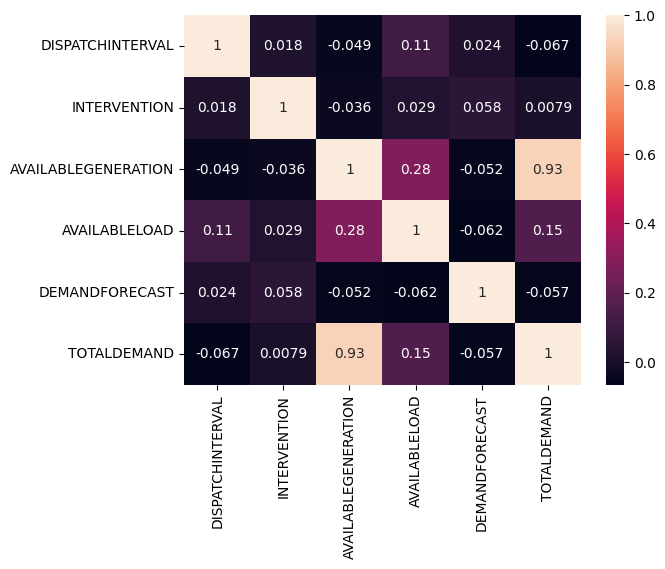

In [ ]:
i=0

columns = new_data.columns.values[i*5:min(i*5+5, len(new_data.columns.values))]
dummy = new_data[columns]
dummy["TOTALDEMAND"] = target

print(sns.heatmap(data=dummy.corr(), annot=True))

In [ ]:
import pandas as pd

data = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_vic.csv")

new_data = data[["Dates", "TOTALDEMAND"]]

new_data.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_vic_target_only.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_2012_zone_1_load.csv")

In [ ]:
data.to_csv(r"/home/david/Git/Energy-Forecasting/data/gefcom_2012_zone_1_load.csv", index=False)

In [ ]:
data.rename(columns={'Load': "Temp"}, inplace=True)

In [ ]:
data["Load"] = data["Load"].str.replace(',', '')

In [ ]:
data.sort_values(by=["Date", "Hour"], inplace=True)

In [ ]:
data.head()

,Date,Hour,Temp
0,2004-01-01,0,46.0
1,2004-01-01,1,46.0
2,2004-01-01,2,45.0
3,2004-01-01,3,41.0
4,2004-01-01,4,39.0


In [ ]:
type(data["Temp"].iloc[0])

numpy.float64

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, mean_absolute_percentage_error as mape

sns.set_style("darkgrid")
%matplotlib inline

In [55]:
set_name = "AEMO"
step = "1_week"
refractor = "GA_"
title = "Comparison of Model Performances on AEMO Dataset for 1 Week Forecasts"
ylabel = "Load (kW)"
shift = 288*7
shows = 999

In [24]:
dates = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_nsw_target_only.csv")
dates = dates.iloc[-shows:]
dates = dates["Dates"]
dates = dates.reset_index(drop=True)
dates.head()

0    2022-12-28 12:50:00
1    2022-12-28 12:55:00
2    2022-12-28 13:00:00
3    2022-12-28 13:05:00
4    2022-12-28 13:10:00
Name: Dates, dtype: object

In [43]:
base = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_nsw_target_only.csv")["TOTALDEMAND"].shift(shift).iloc[-shows-1:].reset_index(drop=True)
base

0      4002.70
1      4045.10
2      4084.76
3      4125.21
4      4143.89
        ...   
995    4309.83
996    4265.77
997    4235.23
998    4203.53
999    4181.72
Name: TOTALDEMAND, Length: 1000, dtype: float64

In [45]:
df = pd.read_csv(r"/home/david/Downloads/AEMO_performances_2016.csv")
# df["Baseline"] = df["Actual"].shift(shift)
df.drop(columns=["Date"], inplace=True, errors="ignore")
df = df.reset_index(drop=True)
df["Date"] = dates
df.set_index("Date", inplace=True)
df.rename(columns={"Basic_nn": "NN", "lstm": "LSTM", "cnn": "CNN"}, inplace=True)
# df["Baseline"] = base
# df.dropna(how='any', axis='rows', inplace=True)
df.head()

,Actual,NN,LSTM,CNN
Date,,,,
2022-12-28 12:50:00,6105.61,6453.1836,6470.5786,6496.2620
2022-12-28 12:55:00,6137.83,6484.3390,6444.1900,6477.6904
2022-12-28 13:00:00,6181.11,6519.4663,6434.4530,6480.1865
2022-12-28 13:05:00,6024.59,6559.6300,6442.3980,6503.9430
2022-12-28 13:10:00,6071.33,6618.5166,6453.1665,6550.7607


In [46]:
ga = pd.read_csv(r"/home/david/Git/Energy-Forecasting/src/genetic_algorithm/predictions.csv")
ga = ga.iloc[-shows:]
ga = ga["prediction"]

In [47]:
df.shape, base.shape

((1000, 4), (1000,))

In [48]:
df["GA"] = ga

In [58]:
data = df[["Actual", "GA"]]

In [59]:
# Create a line plot using Plotly Express
fig = px.line(data, title=title)

# Customize the figure (optional)
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text=ylabel)

# Dark mode background
fig.update_layout(
    plot_bgcolor='black',  # Set the background color to black
    paper_bgcolor='black',  # Set the plot paper background color to black
    font_color='white',     # Set font color to white for contrast
    width=1200,              # Increase the figure width
    height=700,             # Increase the figure height
    legend_title_text='Legend',
    legend=dict(orientation='h'),
)

# Show the plot
fig.show()

In [56]:
fig.write_image(f"/home/david/Git/Energy-Forecasting/Plots/{set_name}_{step}_{refractor}dark.png", engine="kaleido")

In [53]:
# Create a line plot using Plotly Express
fig = px.line(data, title=title)

# Customize the figure (optional)
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text=ylabel)
fig.update_layout(width=1200,              # Increase the figure width
                height=700,             # Increase the figure height
                legend_title_text='Legend',
                legend=dict(orientation='h'),
)

# Show the plot
fig.show()

In [57]:
fig.write_image(f"/home/david/Git/Energy-Forecasting/Plots/{set_name}_{step}_{refractor}light.png", engine="kaleido")

In [5]:
import pandas_datareader as web
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [12]:
start_date = "2010-01-1"
end_date = "2022-12-31"

In [18]:
goog = yf.Ticker('goog')
data = goog.history(start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Close"]]
data.dropna(how="any", axis="rows", inplace=True)
data.head()
# data.info()

,Open,High,Low,Close
Date,,,,
2010-01-04 00:00:00-05:00,15.615220,15.678981,15.547723,15.610239
2010-01-05 00:00:00-05:00,15.620949,15.637387,15.480475,15.541497
2010-01-06 00:00:00-05:00,15.588072,15.588072,15.102393,15.149715
2010-01-07 00:00:00-05:00,15.178109,15.193053,14.760922,14.797037
2010-01-08 00:00:00-05:00,14.744733,15.024933,14.672753,14.994298


In [19]:
data.to_csv(r"/home/david/Git/Energy-Forecasting/data/stocks.csv", index=True)

In [5]:
from datetime import datetime
from io import BytesIO
from zipfile import ZipFile
from typing import Optional
from tqdm import tqdm

# import plotly.express as px

import polars as pl
import pandas as pd
import requests

base_url = "http://nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/{year:04d}/MMSDM_{year:04d}_{month:02d}/MMSDM_Historical_Data_SQLLoader/DATA/PUBLIC_DVD_{table}_{year:04d}{month:02d}010000.zip"

In [2]:

def extract_columns(zf: ZipFile) -> set[str]:
    return set(
        pl.read_csv(
            zf.open(str(zf.filelist[0].filename)).read(),
            n_rows=2,
            skip_rows=1,
        ).columns
    )



In [3]:

def get_table(
    table: str,
    dt: datetime,
    drop_columns: Optional[set[str]] = None,
    datetime_columns: Optional[set[str]] = None,
    string_columns: Optional[set[str]] = None,
    integer_columns: Optional[set[str]] = None,
    non_nullable_columns: Optional[set[str]] = None,
) -> requests.Response:
    response = requests.get(base_url.format(table=table, year=dt.year, month=dt.month))
    response.raise_for_status()

    # Default to empty set
    drop_columns = drop_columns or set()
    string_columns = string_columns or set()
    datetime_columns = datetime_columns or set()
    integer_columns = integer_columns or set()

    data = BytesIO(response.content)

    with ZipFile(data) as zf:
        columns = extract_columns(zf)
        dtypes = {
            **{col: pl.Float32 for col in columns - drop_columns - datetime_columns},
            **{col: pl.Datetime for col in datetime_columns},
            **{col: pl.Utf8 for col in string_columns},
            **{col: pl.Int64 for col in integer_columns},
        }
        return (
            pl.concat(
                [
                    pl.read_csv(
                        zf.open(file.filename).read(),
                        skip_rows=1,
                        dtypes=dtypes,
                    ).lazy()
                    for file in zf.filelist
                ]
            )
            .drop_nulls(subset=non_nullable_columns)
            .drop(columns=list(drop_columns))
        )



In [4]:

def select_column_subset(df: pl.LazyFrame) -> pl.LazyFrame:
    return df.select(
        [
            "DATETIME",
            "forecast_type",
            "forecast_at",
            "forecast_horizon_mins",
            "REGIONID",
            "TOTALDEMAND",
        ]
    )



In [5]:

def get_p5min_regionsolution(dt: datetime) -> pl.LazyFrame:
    """
    Gather 5-minutely forecasts from NEMweb.
    These forecasts are up to one hour ahead of the forecast time.
    """
    drop_columns = {"I", "P5MIN", "REGIONSOLUTION", "7"}
    string_columns = {"I", "P5MIN", "REGIONSOLUTION", "REGIONID"}
    datetime_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "LASTCHANGED"}
    integer_columns = {"INTERVENTION"}
    non_nullable_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "REGIONID"}

    df = select_column_subset(
        get_table(
            table="P5MIN_REGIONSOLUTION",
            dt=dt,
            drop_columns=drop_columns,
            string_columns=string_columns,
            datetime_columns=datetime_columns,
            integer_columns=integer_columns,
            non_nullable_columns=non_nullable_columns,
        )
        # This is where the NEMweb data will be converted to a more usable format
        # If you want any additional columns, here's where to grab them!
        .with_columns(
            [
                (pl.col("INTERVAL_DATETIME") - pl.col("RUN_DATETIME"))
                .dt.cast_time_unit("ms")
                .dt.minutes()
                .alias("forecast_horizon_mins"),
                pl.lit("P5MIN").alias("forecast_type"),
            ]
        ).rename({"INTERVAL_DATETIME": "DATETIME", "RUN_DATETIME": "forecast_at"})
    )

    return df



In [6]:

def get_predispatch(dt: datetime) -> pl.LazyFrame:
    """
    Gather half-hourly forecasts from NEMweb.
    These forecasts are up to 2 days ahead of the forecast time.

    More information can be found here:
    https://nemweb.com.au/Reports/Current/MMSDataModelReport/Electricity/MMS%20Data%20Model%20Report_files/MMS_285.htm
    """
    drop_columns = {"I", "PREDISPATCH", "REGION_SOLUTION", "5", "RUNNO"}
    string_columns = {"I", "PREDISPATCH", "REGION_SOLUTION", "REGIONID"}
    datetime_columns = {"DATETIME", "LASTCHANGED"}
    integer_columns = {"INTERVENTION"}
    non_nullable_columns = {"DATETIME", "REGIONID"}

    df = select_column_subset(
        get_table(
            table="PREDISPATCHREGIONSUM_D",
            dt=dt,
            drop_columns=drop_columns,
            string_columns=string_columns,
            datetime_columns=datetime_columns,
            integer_columns=integer_columns,
            non_nullable_columns=non_nullable_columns,
        )
        # This is where the NEMweb data will be converted to a more usable format
        # If you want any additional columns, here's where to grab them!
        .with_columns(
            [
                pl.lit("PREDISPATCH").alias("forecast_type"),
                pl.col("LASTCHANGED").dt.round("30m").alias("forecast_at"),
            ]
        ).with_columns(
            [
                (pl.col("DATETIME") - pl.col("forecast_at"))
                .dt.cast_time_unit("ms")
                .dt.minutes()
                .alias("forecast_horizon_mins"),
            ]
        )
    )

    return df



In [7]:

def get_pdpasa(dt: datetime) -> pl.LazyFrame:
    """
    Get half-hourly forecasts up to 2 days ahead (next trading interval until the end of the next trading day).

    More information can be found here:
    https://nemweb.com.au/Reports/Current/MMSDataModelReport/Electricity/MMS%20Data%20Model%20Report_files/MMS_485.htm#1
    https://aemo.com.au/en/energy-systems/electricity/national-electricity-market-nem/nem-forecasting-and-planning/forecasting-and-reliability/projected-assessment-of-system-adequacy

    """
    drop_columns = {"I", "PDPASA", "REGIONSOLUTION", "6", "RUNNO", "RUNTYPE"}
    string_columns = {"I", "PDPASA", "REGIONSOLUTION", "REGIONID"}
    datetime_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "LASTCHANGED"}
    non_nullable_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "REGIONID"}

    df = select_column_subset(
        get_table(
            table="PDPASA_REGIONSOLUTION",
            dt=dt,
            drop_columns=drop_columns,
            string_columns=string_columns,
            datetime_columns=datetime_columns,
            non_nullable_columns=non_nullable_columns,
        )
        # This is where the NEMweb data will be converted to a more usable format
        # If you want any additional columns, here's where to grab them!
        .with_columns(
            [
                (pl.col("INTERVAL_DATETIME") - pl.col("RUN_DATETIME"))
                .dt.cast_time_unit("ms")
                .dt.minutes()
                .alias("forecast_horizon_mins"),
                pl.lit("PDPASA").alias("forecast_type"),
            ]
        )
        # Note: I'm taking the 50th percentile (i.e. median) forecast as the total demand forecast
        .rename(
            {
                "INTERVAL_DATETIME": "DATETIME",
                "RUN_DATETIME": "forecast_at",
                "DEMAND50": "TOTALDEMAND",
            }
        )
    )

    return df



In [8]:

def get_stpasa(dt: datetime) -> pl.LazyFrame:
    """
    Get half-hourly forecasts up to 6 days ahead.

    More information can be found here:
    https://nemweb.com.au/Reports/Current/MMSDataModelReport/Electricity/MMS%20Data%20Model%20Report_files/MMS_353.htm#1
    https://aemo.com.au/en/energy-systems/electricity/national-electricity-market-nem/nem-forecasting-and-planning/forecasting-and-reliability/projected-assessment-of-system-adequacy

    """
    drop_columns = {"I", "STPASA", "REGIONSOLUTION", "6", "RUNNO", "RUNTYPE"}
    string_columns = {"I", "STPASA", "REGIONSOLUTION", "REGIONID"}
    datetime_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "LASTCHANGED"}
    non_nullable_columns = {"RUN_DATETIME", "INTERVAL_DATETIME", "REGIONID"}

    df = select_column_subset(
        get_table(
            table="STPASA_REGIONSOLUTION",
            dt=dt,
            drop_columns=drop_columns,
            string_columns=string_columns,
            datetime_columns=datetime_columns,
            non_nullable_columns=non_nullable_columns,
        )  # This is where the NEMweb data will be converted to a more usable format
        # If you want any additional columns, here's where to grab them!
        .with_columns(
            [
                (pl.col("INTERVAL_DATETIME") - pl.col("RUN_DATETIME"))
                .dt.cast_time_unit("ms")
                .dt.minutes()
                .alias("forecast_horizon_mins"),
                pl.lit("STPASA").alias("forecast_type"),
            ]
        )
        # Note: I'm taking the 50th percentile (i.e. median) forecast as the total demand forecast
        .rename(
            {
                "INTERVAL_DATETIME": "DATETIME",
                "RUN_DATETIME": "forecast_at",
                "DEMAND50": "TOTALDEMAND",
            }
        )
    )

    return df



In [9]:

def get_dispatch(dt: datetime) -> pl.LazyFrame:
    """
    Get dispatch data from NEMweb. This is the actual dispatch data, not the forecasted data.
    """

    drop_columns = {"I", "DISPATCH", "REGIONSUM", "5", "RUNNO"}
    string_columns = {"I", "DISPATCH", "REGIONSUM", "REGIONID"}
    datetime_columns = {"SETTLEMENTDATE", "LASTCHANGED"}
    integer_columns = {"INTERVENTION"}
    non_nullable_columns = {"SETTLEMENTDATE", "REGIONID"}

    df = (
        get_table(
            table="DISPATCHREGIONSUM",
            dt=dt,
            drop_columns=drop_columns,
            string_columns=string_columns,
            datetime_columns=datetime_columns,
            integer_columns=integer_columns,
            non_nullable_columns=non_nullable_columns,
        )
        # This is where the NEMweb data will be converted to a more usable format
        # If you want any additional columns, here's where to grab them!
        .with_columns(
            [
                pl.lit("DISPATCH").alias("forecast_type"),
                pl.lit(None, dtype=pl.Datetime).alias("forecast_at"),
                pl.lit(None, dtype=pl.Int64).alias("forecast_horizon_mins"),
            ]
        )
        .rename({"SETTLEMENTDATE": "DATETIME"})
        .select(
            [
                "DATETIME",
                "forecast_type",
                "forecast_at",
                "forecast_horizon_mins",
                "REGIONID",
                "TOTALDEMAND",
            ]
        )
    )

    return df



In [10]:

start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)
dfs: list[pl.LazyFrame] = []

date_range = pl.datetime_range(start, end, "1mo", eager=True)

for dt in tqdm(date_range, desc="Fetching AEMO data", total=len(date_range)):
    # Combine dispatch and forecasts
    get_functions = [
        get_dispatch,
        get_p5min_regionsolution,
        get_predispatch,
        get_pdpasa,
        get_stpasa,
    ]
    df = pl.concat(
        [
            get(dt)
            for get in tqdm(
                get_functions,
                total=len(get_functions),
                desc=f"Fetching data for {dt.strftime('%Y-%m')}",
            )
        ]
    )
    dfs.append(df)
    break

    # Plot -- left commented out as you likely want to reduce the amount of data you're plotting
    # for the snippet below, I've reduced it to 3 days of data and only half-hourly forecasts (or dispatch)
    # fig = px.line(
    #     df.filter(pl.col("DATETIME") < datetime(2022, 1, 4))
    #     .filter(
    #         (pl.col("forecast_horizon_mins") == 30)
    #         | (pl.col("forecast_horizon_mins").is_null())
    #     )
    #     .sort(pl.col("DATETIME"))
    #     .to_pandas(),
    #     x="DATETIME",
    #     y="TOTALDEMAND",
    #     color="forecast_type",
    #     facet_row="REGIONID",
    #     facet_col="forecast_horizon_mins",
    # )
    # fig.show()

df = (
    pl.concat(dfs)
    .filter(pl.col("DATETIME").is_between(start, end))
    .sink_parquet(
        f"AEMO_load_data_{start.strftime('%Y-%m')}_{end.strftime('%Y-%m')}.parquet"
    )
)
print("Done!")



Fetching AEMO data:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching AEMO data:   0%|          | 0/13 [00:49<?, ?it/s]


Done!


In [52]:
df = pl.read_parquet(r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-01_2023-01_2022-01-01 00:00:00.parquet").to_pandas()
df = df[df["REGIONID"] == "NSW1"]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628603 entries, 0 to 3143010
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATETIME               628603 non-null  datetime64[ns]
 1   forecast_type          628603 non-null  object        
 2   forecast_at            619675 non-null  datetime64[ns]
 3   forecast_horizon_mins  619675 non-null  float64       
 4   REGIONID               628603 non-null  object        
 5   TOTALDEMAND            628603 non-null  float32       
dtypes: datetime64[ns](2), float32(1), float64(1), object(2)
memory usage: 31.2+ MB


In [53]:
present = df[df["forecast_horizon_mins"] == 0]

In [55]:
present.head()

,DATETIME,forecast_type,forecast_at,forecast_horizon_mins,REGIONID,TOTALDEMAND
44640,2022-01-01 00:05:00,P5MIN,2022-01-01 00:05:00,0.0,NSW1,7206.029785
44700,2022-01-01 00:10:00,P5MIN,2022-01-01 00:10:00,0.0,NSW1,7174.259766
44760,2022-01-01 00:15:00,P5MIN,2022-01-01 00:15:00,0.0,NSW1,7135.000000
44820,2022-01-01 00:20:00,P5MIN,2022-01-01 00:20:00,0.0,NSW1,7065.839844
44880,2022-01-01 00:25:00,P5MIN,2022-01-01 00:25:00,0.0,NSW1,6995.080078


In [17]:
step.head()

,DATETIME,forecast_type,forecast_at,forecast_horizon_mins,REGIONID,TOTALDEMAND
44641,2022-01-01 00:10:00,P5MIN,2022-01-01 00:05:00,5.0,NSW1,7143.180176
44653,2022-01-01 00:10:00,P5MIN,2022-01-01 00:05:00,5.0,QLD1,5972.870117
44665,2022-01-01 00:10:00,P5MIN,2022-01-01 00:05:00,5.0,SA1,1733.530029
44677,2022-01-01 00:10:00,P5MIN,2022-01-01 00:05:00,5.0,TAS1,1143.540039
44689,2022-01-01 00:10:00,P5MIN,2022-01-01 00:05:00,5.0,VIC1,4957.629883


In [18]:
df["REGIONID"].unique()

array(['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1'], dtype=object)

In [57]:
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

presents = pd.DataFrame({"DATETIME": [], "forecast_type": [], "TOTALDEMAND": []})
steps = pd.DataFrame({"DATETIME": [], "forecast_type": [],  "TOTALDEMAND": []})
days = pd.DataFrame({"DATETIME": [], "forecast_type": [],  "TOTALDEMAND": []})
weeks = pd.DataFrame({"DATETIME": [], "forecast_type": [],  "TOTALDEMAND": []})

paths = [r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-01_2023-01_2022-01-01 00:00:00.parquet",
         r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-01_2023-01_2022-02-01 00:00:00.parquet",
         r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-03_2022-05_2022-03-01 00:00:00.parquet",
         r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-03_2022-05_2022-04-01 00:00:00.parquet",
         r"/home/david/Git/Energy-Forecasting/AEMO_load_data_2022-03_2022-05_2022-05-01 00:00:00.parquet"]


date_range = pl.datetime_range(start, end, "1mo", eager=True)

for path in paths:
    df = pl.read_parquet(path).to_pandas()
    
    df = df[df["REGIONID"] == "NSW1"]

    present = df[df["forecast_horizon_mins"] == 0].reset_index(drop=True).drop(columns=["REGIONID", "forecast_horizon_mins", "forecast_at"])
    step = df[df["forecast_horizon_mins"] == 5].reset_index(drop=True).drop(columns=["REGIONID", "forecast_horizon_mins", "forecast_at"])
    day = df[df["forecast_horizon_mins"] == 1440].reset_index(drop=True).drop(columns=["REGIONID", "forecast_horizon_mins", "forecast_at"])
    week = df[df["forecast_horizon_mins"] == 1440*7].reset_index(drop=True).drop(columns=["REGIONID", "forecast_horizon_mins", "forecast_at"])

    presents = pd.concat([presents, present])
    steps = pd.concat([steps, step])
    days = pd.concat([days, day])
    weeks = pd.concat([weeks, week])

presents.dropna(how="any", axis="rows", inplace=True)
steps.dropna(how="any", axis="rows", inplace=True)
days.dropna(how="any", axis="rows", inplace=True)
weeks.dropna(how="any", axis="rows", inplace=True)

presents.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_presents.csv", index=False)
steps.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_steps.csv", index=False)
days.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_days.csv", index=False)
weeks.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_weeks.csv", index=False)



/tmp/ipykernel_3993/2777676540.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  presents = pd.concat([presents, present])
/tmp/ipykernel_3993/2777676540.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  steps = pd.concat([steps, step])
/tmp/ipykernel_3993/2777676540.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain t

In [83]:
path = r"/home/david/Git/Energy-Forecasting/data/aemo_presents.csv"
df = pd.read_csv(path)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81652 entries, 0 to 81651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATETIME       81652 non-null  object 
 1   forecast_type  81652 non-null  object 
 2   TOTALDEMAND    81652 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.9+ MB


In [85]:
df["forecast_type"].value_counts()

forecast_type
P5MIN          69984
PDPASA         11662
PREDISPATCH        6
Name: count, dtype: int64

In [86]:
df = df[df["forecast_type"] == "P5MIN"]
df = df.drop_duplicates()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34560 entries, 0 to 59715
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATETIME       34560 non-null  object 
 1   forecast_type  34560 non-null  object 
 2   TOTALDEMAND    34560 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [88]:
df.to_csv(path, index=False)

In [92]:
paths = [r"/home/david/Git/Energy-Forecasting/data/aemo_days.csv",
         r"/home/david/Git/Energy-Forecasting/data/aemo_presents.csv",
         r"/home/david/Git/Energy-Forecasting/data/aemo_steps.csv",
         r"/home/david/Git/Energy-Forecasting/data/aemo_weeks.csv"]

for path in paths:
    df = pd.read_csv(path)
    df.drop(columns=["forecast_type"], inplace=True)
    df.to_csv(path, index=False)

In [93]:
present = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_presents.csv").set_index("DATETIME", drop=True)
step = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_steps.csv").set_index("DATETIME", drop=True)
day = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_days.csv").set_index("DATETIME", drop=True)
week = pd.read_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_weeks.csv").set_index("DATETIME", drop=True)

In [95]:
present["5MIN"] = step["TOTALDEMAND"]
present["DAY"] = day["TOTALDEMAND"]
present["WEEK"] = week["TOTALDEMAND"]

In [96]:
present.head()

,TOTALDEMAND,5MIN,DAY,WEEK
DATETIME,,,,
2022-01-01 00:05:00,7206.03,NaN,NaN,NaN
2022-01-01 00:10:00,7174.26,7143.18,NaN,NaN
2022-01-01 00:15:00,7135.00,7147.66,NaN,NaN
2022-01-01 00:20:00,7065.84,7074.38,NaN,NaN
2022-01-01 00:25:00,6995.08,7025.79,NaN,NaN


In [97]:
present.to_csv(r"/home/david/Git/Energy-Forecasting/data/aemo_collected.csv", index=True)

In [103]:
step = present[present['TOTALDEMAND'].notnull() & present['5MIN'].notnull()]
step = step[["TOTALDEMAND", "5MIN"]]

day = present[present['TOTALDEMAND'].notnull() & present['DAY'].notnull()]
day = day[["TOTALDEMAND", "DAY"]]

week = present[present['TOTALDEMAND'].notnull() & present['WEEK'].notnull()]
week = week[["TOTALDEMAND", "WEEK"]]

In [107]:
week.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808 entries, 2022-01-08 01:00:00 to 2022-05-01 00:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTALDEMAND  1808 non-null   float64
 1   WEEK         1808 non-null   float64
dtypes: float64(2)
memory usage: 42.4+ KB


In [108]:
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, mean_absolute_percentage_error as mape

In [110]:
frames = {"step": step, "day": day, "week": week}
predictions = ["5MIN", "DAY", "WEEK"]

for count, (key, frame) in enumerate(frames.items()):

    print(key)
    
    MAE = mae(frame["TOTALDEMAND"], frame[predictions[count]])
    MAPE = mape(frame["TOTALDEMAND"], frame[predictions[count]])
    RMSE = mse(frame["TOTALDEMAND"], frame[predictions[count]], squared=False)
    R2 = r2_score(frame["TOTALDEMAND"], frame[predictions[count]])

    print(f"R2: {R2}")
    print(f"MAPE: {MAPE}")
    print(f"MAE: {MAE}")
    print(f"RMSE: {RMSE}")

    print()
    print()

step
R2: 0.9970552655280605
MAPE: 0.005816031635975666
MAE: 42.484347926733996
RMSE: 54.45752932690425


day
R2: 0.9404989329394332
MAPE: 0.025905796651465474
MAE: 198.15733459869853
RMSE: 260.6810863848389


week
R2: 0.8582803485532065
MAPE: 0.03760864438210677
MAE: 291.8236670353982
RMSE: 407.0661380487972


